In [144]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data

city = pd.read_csv(city_data_to_load)
ride = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset

df = pd.merge(city, ride, on= "city", how= "left")
city_df = df.groupby(["city", "type"]).count()
avg_df = df.groupby(["city", "type"]).mean()

city_df["Avg Fare"] = avg_df["fare"] 
city_df["# Driver"] = avg_df["driver_count"]
city_df = city_df.rename(columns = {"ride_id":"# Rides"})
city_df = city_df[["# Driver", "# Rides", "Avg Fare"]]

city_df = city_df.reset_index()
city_df = city_df.rename(columns = {"type": \"City_Type"})

# Display the data table for preview
city_df.head()

,city,City_Type,# Driver,# Rides,Avg Fare
0,Amandaburgh,Urban,12.0,18,24.641667
1,Barajasview,Urban,26.0,22,25.332273
2,Barronchester,Suburban,11.0,16,36.422500
3,Bethanyland,Suburban,22.0,18,32.956111
4,Bradshawfurt,Rural,7.0,10,40.064000


In [145]:
#check my dataframes
rural = city_df.loc[city_df["City_Type"] == "Rural", :]
suburban = city_df.loc[city_df["City_Type"] =="Suburban", :]
urban = city_df.loc[city_df["City_Type"] == "Urban", :]

rural.head()
suburban.head()

,city,City_Type,# Driver,# Rides,Avg Fare
2,Barronchester,Suburban,11.0,16,36.422500
3,Bethanyland,Suburban,22.0,18,32.956111
5,Brandonfort,Suburban,10.0,19,35.437368
8,Colemanland,Suburban,23.0,22,30.894545
9,Davidfurt,Suburban,23.0,17,31.995882


## Bubble Plot of Ride Sharing Data

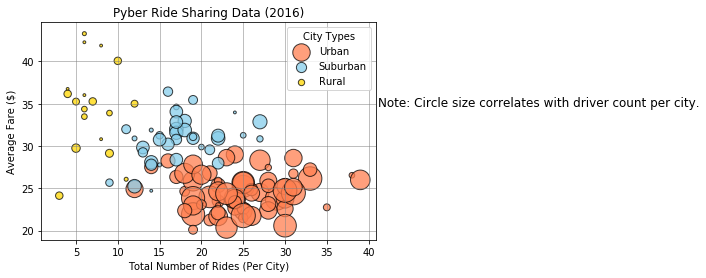

In [160]:
# Obtain the x and y coordinates for each of the three city types

rural = city_df.loc[city_df["City_Type"] == "Rural", :]
suburban = city_df.loc[city_df["City_Type"] =="Suburban", :]
urban = city_df.loc[city_df["City_Type"] == "Urban", :]

rural_x = rural["# Rides"]
suburban_x = suburban["# Rides"]
urban_x = urban["# Rides"]
rural_y = rural["Avg Fare"]
suburban_y = suburban["Avg Fare"]
urban_y = urban["Avg Fare"]
rural_size = rural["# Driver"]*8
suburban_size = suburban["# Driver"]*8
urban_size=urban["# Driver"]*8

City_Type = ("Rural", "Suburban", "Urban")


# Build the scatter plots for each city types

plt.scatter(urban_x, urban_y, marker = "o", color='coral', s = urban_size, edgecolors = "black", label='Urban', alpha = 0.75);
plt.scatter(suburban_x, suburban_y, marker = "o", color='skyblue', s = suburban_size, edgecolors = "black", label='Suburban', alpha = 0.75);
plt.scatter(rural_x, rural_y, marker = "o", color='Gold', s = rural_size, edgecolors = "black", label='Rural', alpha = 0.75)

# Incorporate the other graph properties

plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid(linestyle='-', linewidth='0.5', color='gray')

# Create a legend

plt.legend(title = "City Types", loc = "upper right")
#NOte - My legend is off - the size of circles should be uniform, but they are not.

# Incorporate a text label regarding circle size

plt.figtext(1.65, .6,"Note: Circle size correlates with driver count per city.", wrap=True, horizontalalignment = "right", verticalalignment='center', fontsize=12)

# Save Figure

plt.savefig("../Pyber/Scatter.png")

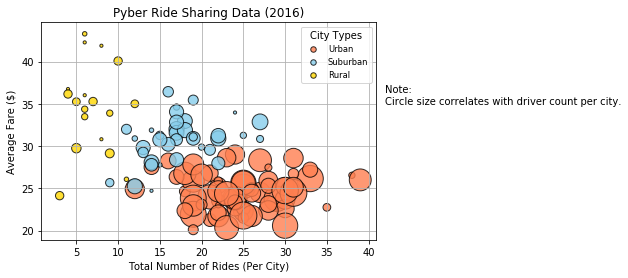

In [3]:
# Show plot
plt.show()

## Total Fares by City Type

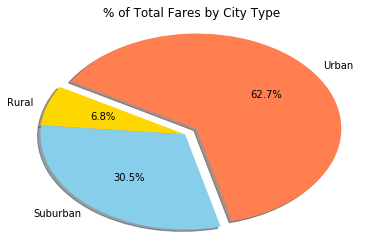

<Figure size 432x288 with 0 Axes>

In [89]:
# Calculate Type Percents

total = df.groupby(["City_Type"]).sum()
#total.head()

# Build Pie Chart

Total_Fares = total["fare"]
Type = ("Rural", "Suburban", "Urban")
colors = ["gold", "skyblue", "coral"]
explode = (0, 0, .1)
plt.title("% of Total Fares by City Type")
plt.pie(Total_Fares, colors=colors, explode=explode, autopct="%1.1f%%", labels = Type, shadow=True, startangle=150, radius = 1)
#make it flattish, not "equal"
plt.axis("auto")
plt.show()

# Save Figure

plt.savefig("../Pyber/Total_Fares.png")


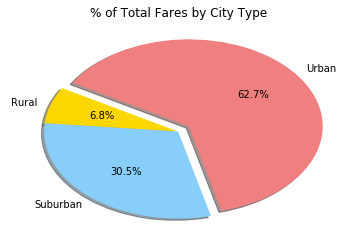

In [4]:
# Show Figure
plt.show()

## Total Rides by City Type

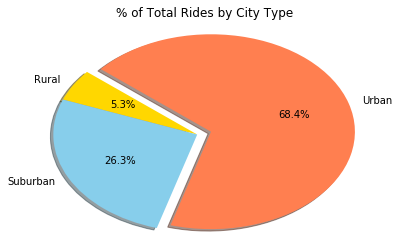

<Figure size 432x288 with 0 Axes>

In [88]:
# Calculate Ride Percents

total_R = df.groupby(["City_Type"]).count()
#total_R.head()

# Build Pie Chart
Total_Rides = total_R["ride_id"]
#labels = total_R["type"]
colors = ["gold", "skyblue", "coral"]
explode = (0, 0, .1)
Type = ("Rural", "Suburban", "Urban")

plt.pie(Total_Rides, colors=colors, explode = explode, labels = Type, autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Rides by City Type")
plt.axis("auto")
plt.show()
# Save Figure

plt.savefig("../Pyber/Total_Rides.png")

In [114]:
# Show Figure
plt.show()

## Total Drivers by City Type

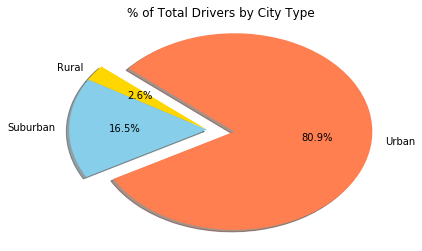

<Figure size 432x288 with 0 Axes>

In [87]:
# Calculate Driver Percents

total_D = city_df.groupby(["City_Type"]).sum()
total_D.head()

# Build Pie Chart
Total_Drivers = total_D["# Driver"]
colors = ["gold", "skyblue", "coral"]
explode = (0, 0, .2)
Type = ("Rural", "Suburban", "Urban")

plt.pie(Total_Drivers, colors=colors, explode = explode, labels = Type, autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Drivers by City Type")
plt.axis("auto")
plt.show()
# Build Pie Charts

# Save Figure

plt.savefig("../Pyber/Total_Drivers.png")

In [116]:
# Show Figure
plt.show()